### Exercise 10.2: Building a CNN Image Classifier


#### Name: Nicolas Bolanos


#### Date: 08/2023

##### Instructions


In this exercise, you will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset. The steps to build a CNN classifier are outlined in section 20.15 of the Machine Learning with Python Cookbook, but keep in mind that your code may need to be modified depending on your version of Keras.

######  1) Load the MNIST data set.

In [96]:
# Importing Required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow import keras

from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

ImportError: cannot import name 'np_utils' from 'keras.utils' (C:\Users\Nicol\AppData\Roaming\Python\Python39\site-packages\keras\utils\__init__.py)

Loading the MNIST data set

In [97]:
# loading dataset from mnist import
(data_train, target_train),(data_test, target_test) = mnist.load_data()

2) Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

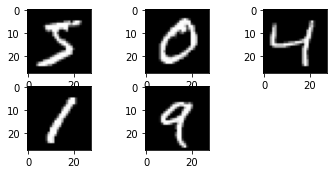

In [102]:
# Output first five images
for i in range(5):
    
    # Applying subplot
    plt.subplot(330 + 1 + i)
    
    # Plotting raw pixel data
    plt.imshow(data_train[i], cmap=plt.get_cmap('gray'))
    
# Display plot
plt.show()

In [106]:
# Output first five labels
pd.DataFrame(target_train[0:5]).set_axis(['label'], axis=1)

,label
0,5
1,0
2,4
3,1
4,9


3) Build and train a Keras CNN classifier on the MNIST training set.

In [107]:
from keras import backend as K


In [109]:
# Resources from 20.15

# Set that the color channel value will be first
K.set_image_data_format("channels_last")

In [110]:
# Set Seed
np.random.seed(0)

In [111]:
# Set image information
channels = 1
height = 28
width = 28

In [112]:
# reshape dataset to have a single-channel
data_train = data_train.reshape((data_train.shape[0], 28, 28, 1)) # checks height, width, channel

data_test = data_test.reshape((data_test.shape[0], 28, 28, 1)) 

In [113]:
# Rescale pixel intensity between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

In [114]:
# One-hot encode target
target_train = keras.utils.to_categorical(target_train)
target_test = keras.utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [115]:
# Start neural network
network = Sequential()

In [117]:
from tensorflow.keras.layers import Conv2D


# Add Convolutional layer with 64 filters, a 5 x 5 window, and ReLU activation function
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(height, width, channels),
                   activation='relu'))

In [118]:
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

In [119]:
# Add dropout layer
network.add(Dropout(0.5))

In [120]:
# Add dropout layer
network.add(Flatten())

In [121]:
# Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

In [122]:
# Add dropout layer
network.add(Dropout(0.5))

In [123]:
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

In [124]:
# Compile neural network
network.compile(loss="categorical_crossentropy",
                optimizer = "rmsprop",
                metrics = ["accuracy"])

In [125]:
# Train neural network
network.fit(features_train, 
 target_train,
 epochs=2, 
 verbose=0,
 batch_size=1000,
 validation_data=(features_test, target_test))

In [133]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [134]:
# Apply model to make predictions on test set
pred = network.predict(data_test)

313/313 [==============================] - 1s 4ms/step


In [135]:
# Converting values for confusion matrix
y_preds = np.argmax(pred, axis=1)

In [136]:
# target_test shape
target_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [138]:
# Converting values for confusion matrix
y_true = np.argmax(target_test, axis=1)

4) Report the test accuracy of your model

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [143]:
# Calculating statistics
accuracy = accuracy_score(y_true, y_preds)
precision = precision_score(y_true, y_preds, average="micro")
recall = recall_score(y_true, y_preds, average="micro")
f1 = f1_score(y_true, y_preds, average="micro")

In [144]:
# Output classification report
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.97      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.98      0.98       892
           6       0.98      0.97      0.98       958
           7       0.99      0.91      0.95      1028
           8       0.90      0.99      0.94       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.96      0.97     10000



5) Display a confusion matrix on the test set classifications

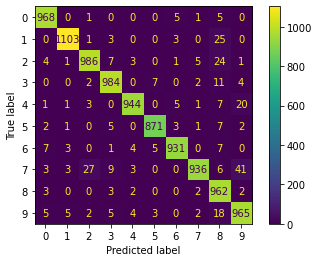

In [145]:
# Print Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_preds)
display_one = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
display_one.plot()
plt.show()

6) The training set conducts the initial phase of the training model. It evaluates the weights of each neural network. Then the test set predicts the accuracy of the each trained neural network. The predictions show a 97% accuracy overall. That demostrates that there is a high capacity of True positives which makes this test set very accurate.  